In [2]:
import numpy as np 
import pandas as pd
import os
import gzip
import random
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train= pd.read_csv("./Project Data/ProjectTrainingData.csv")

In [4]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [5]:
train['hour'] = pd.to_datetime(train['hour'],format = '%y%m%d%H')    

In [11]:
print(train.info())
print(train.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991090 entries, 0 to 31991089
Data columns (total 23 columns):
 #   Column            Dtype         
---  ------            -----         
 0   click             int64         
 1   hour              datetime64[ns]
 2   C1                int64         
 3   banner_pos        int64         
 4   site_id           object        
 5   site_domain       object        
 6   site_category     object        
 7   app_id            object        
 8   app_domain        object        
 9   app_category      object        
 10  device_id         object        
 11  device_ip         object        
 12  device_model      object        
 13  device_type       int64         
 14  device_conn_type  int64         
 15  C14               int64         
 16  C15               int64         
 17  C16               int64         
 18  C17               int64         
 19  C18               int64         
 20  C19               int64         
 21  C20   

In [6]:
train.drop('id',axis=1,inplace = True)

In [7]:
train['day_week'] = train['hour'].apply(lambda x: x.dayofweek)
train['hour_day'] = train['hour'].apply(lambda x: x.hour)

Text(0.5, 1.0, 'Hours of a day')

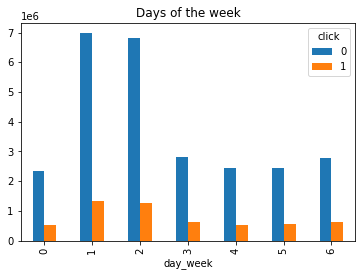

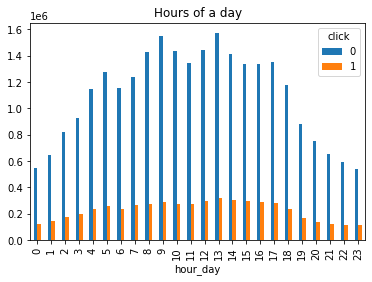

In [20]:
train.groupby(['day_week','click']).size().unstack().plot(kind='bar')
plt.title('Days of the week')
train.groupby(['hour_day','click']).size().unstack().plot(kind='bar')
plt.title('Hours of a day')

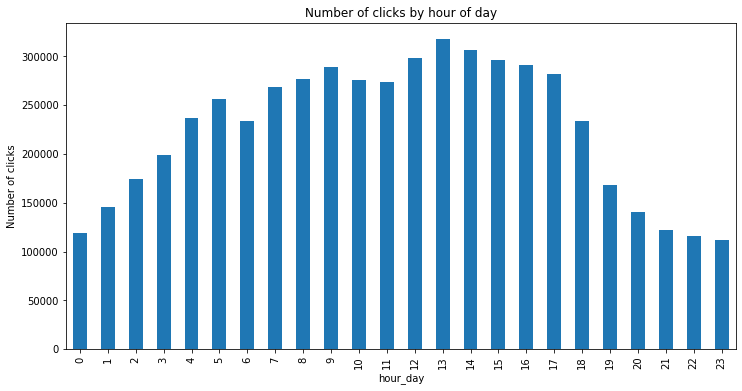

In [21]:
train.groupby('hour_day')['click'].sum().plot.bar(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour of day')
plt.show()

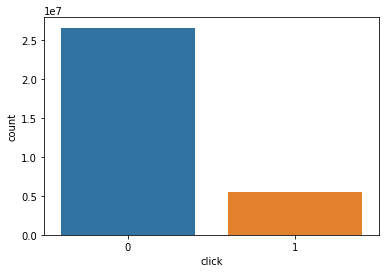

0    0.83011
1    0.16989
Name: click, dtype: float64


In [22]:
sns.countplot(x='click',data=train)
plt.show()
print(train.click.value_counts()/len(train))

<AxesSubplot:ylabel='banner_pos'>

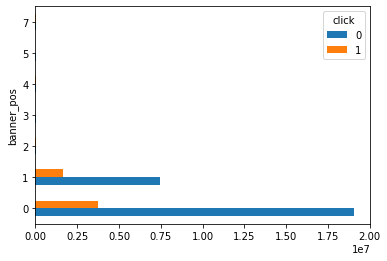

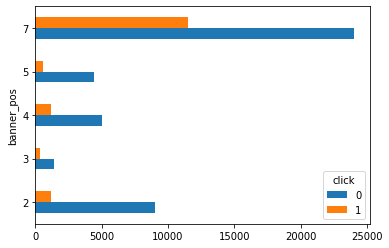

In [23]:
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='barh')
train.groupby(['banner_pos','click']).size().unstack().iloc[2:,:].plot(kind='barh')

In [24]:
site_features = ['site_id', 'site_domain', 'site_category']
train[site_features].describe()

,site_id,site_domain,site_category
count,31991090,31991090,31991090
unique,4581,7341,26
top,85f751fd,c4e18dd6,50e219e0
freq,11170690,11598113,12731910


<AxesSubplot:>

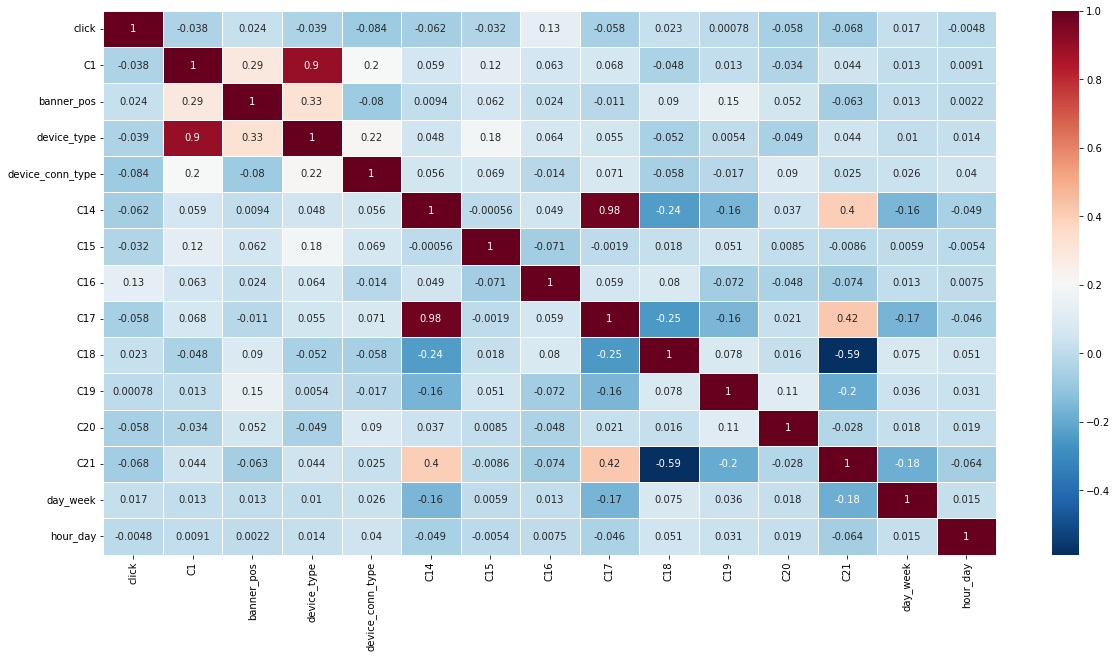

In [8]:
ad_corr = train.corr(method = 'pearson')
fig,ax = plt.subplots(figsize = (20,10))
sns.heatmap(ad_corr,
            xticklabels=ad_corr.columns,
            yticklabels=ad_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1,ax=ax)